In [5]:
import os
import pickle
import json
import time
import pandas as pd
import cv2

from glob import glob
from tqdm import tqdm

import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [6]:
print(f"train image 수 : {len(glob('./Training/images/*/*.jpg')):,}")
print(f"train image 수 : {len(glob('./Training/images/*/*.jpeg')):,}")
print(f"train label 수 : {len(glob('./Training/labels/*/*.json')):,}")

train image 수 : 295,255
train image 수 : 53,893
train label 수 : 349,148


In [7]:
print(f"valid image 수 : {len(glob('./Validation/images/*/*.jpg')):,}")
print(f"valid image 수 : {len(glob('./Validation/images/*/*.jpeg')):,}")
print(f"valid label 수 : {len(glob('./Validation/labels/*/*.json')):,}")

valid image 수 : 22,160
valid image 수 : 18,823
valid label 수 : 40,983


In [8]:
### Train data
start_time = time.time()
tr_json_list = glob('./Training/labels/*/*.json')
print(f"seconds : {time.time() - start_time}")

seconds : 1.2945423126220703


In [9]:
### Valid data
start_time = time.time()
tr_json_list_vd = glob('./Validation/labels/*/*.json')
print(f"seconds : {time.time() - start_time}")

seconds : 0.15857291221618652


In [10]:
### Train data
for i, json_file in enumerate(tqdm(tr_json_list)):
    with open(json_file, 'r') as f:
        json_file = json.load(f)

    json_file_re = {
        '파일이름' : json_file['description']['image'],
        '촬영일자' : json_file['description']['date'],
        'height' : json_file['description']['height'],
        'width' : json_file['description']['width'],
        '과제번호' : json_file['description']['task'],
        '촬영유형코드' : json_file['description']['type'],
        '질병/해충코드' : json_file['annotations']['disease'],
        '작물코드' : json_file['annotations']['crop'],
        '촬영부위코드' : json_file['annotations']['area'],
        '작물생육코드' : json_file['annotations']['grow'],
        '해충피해코드' : json_file['annotations']['risk'],
        'BoundingBox' : json_file['annotations']['points']
    }

    if i == 0:
        tr_json_df = pd.json_normalize(json_file_re)

    else:
        tr_json_df = pd.concat([tr_json_df, pd.json_normalize(json_file_re)])
        
tr_json_df = tr_json_df.reset_index(drop=True)

100%|████████████████████████████████████████████████████████████████████████| 349148/349148 [2:46:19<00:00, 34.99it/s]


In [11]:
### Valid data
for i, json_file in enumerate(tqdm(tr_json_list_vd)):
    with open(json_file, 'r') as f:
        json_file = json.load(f)

    json_file_re = {
        '파일이름' : json_file['description']['image'],
        '촬영일자' : json_file['description']['date'],
        'height' : json_file['description']['height'],
        'width' : json_file['description']['width'],
        '과제번호' : json_file['description']['task'],
        '촬영유형코드' : json_file['description']['type'],
        '질병/해충코드' : json_file['annotations']['disease'],
        '작물코드' : json_file['annotations']['crop'],
        '촬영부위코드' : json_file['annotations']['area'],
        '작물생육코드' : json_file['annotations']['grow'],
        '해충피해코드' : json_file['annotations']['risk'],
        'BoundingBox' : json_file['annotations']['points']
    }

    if i == 0:
        tr_json_df_vd = pd.json_normalize(json_file_re)
        
    else:
        tr_json_df_vd = pd.concat([tr_json_df_vd, pd.json_normalize(json_file_re)])

tr_json_df_vd = tr_json_df_vd.reset_index(drop=True)

100%|███████████████████████████████████████████████████████████████████████████| 40983/40983 [04:24<00:00, 155.16it/s]


In [39]:
### Train data
display(tr_json_df.shape, tr_json_df.head())

(349148, 20)

,파일이름,촬영일자,height,width,과제번호,촬영유형코드,질병/해충코드,작물코드,촬영부위코드,작물생육코드,해충피해코드,BoundingBox,label_code,작물,질병명,피해정도,데이터종류,촬영부위,생육단계,label_name
0,V006_77_0_00_01_01_13_0_c03_20201209_0000_S01_...,2020/12/09,4032,2268,77,0,0,1,1,13,0,"[{'xtl': 788, 'ytl': 940, 'xbr': 1394, 'ybr': ...",1_0_0,가지(1),정상(0),정상(0),시설 작물 질병(77),열매(1),착화/ 과실기(13),가지(1)_정상(0)_정상(0)
1,V006_77_0_00_01_01_13_0_c03_20201209_0001_S01_...,2020/12/09,4032,2268,77,0,0,1,1,13,0,"[{'xtl': 620, 'ytl': 270, 'xbr': 1586, 'ybr': ...",1_0_0,가지(1),정상(0),정상(0),시설 작물 질병(77),열매(1),착화/ 과실기(13),가지(1)_정상(0)_정상(0)
2,V006_77_0_00_01_01_13_0_c03_20201209_0002_S01_...,2020/12/09,4032,2268,77,0,0,1,1,13,0,"[{'xtl': 737, 'ytl': 731, 'xbr': 1517, 'ybr': ...",1_0_0,가지(1),정상(0),정상(0),시설 작물 질병(77),열매(1),착화/ 과실기(13),가지(1)_정상(0)_정상(0)
3,V006_77_0_00_01_01_13_0_c03_20201209_0003_S01_...,2020/12/09,4032,2268,77,0,0,1,1,13,0,"[{'xtl': 823, 'ytl': 1185, 'xbr': 1280, 'ybr':...",1_0_0,가지(1),정상(0),정상(0),시설 작물 질병(77),열매(1),착화/ 과실기(13),가지(1)_정상(0)_정상(0)
4,V006_77_0_00_01_01_13_0_c03_20201209_0004_S01_...,2020/12/09,4032,2268,77,0,0,1,1,13,0,"[{'xtl': 419, 'ytl': 536, 'xbr': 1528, 'ybr': ...",1_0_0,가지(1),정상(0),정상(0),시설 작물 질병(77),열매(1),착화/ 과실기(13),가지(1)_정상(0)_정상(0)


In [13]:
### Valid data
display(tr_json_df_vd.shape, tr_json_df_vd.head())

(40983, 12)

,파일이름,촬영일자,height,width,과제번호,촬영유형코드,질병/해충코드,작물코드,촬영부위코드,작물생육코드,해충피해코드,BoundingBox
0,V006_77_0_00_01_01_13_0_c03_20201209_0000_S01_...,2020/12/09,4032,2268,77,0,0,1,1,13,0,"[{'xtl': 941, 'ytl': 1245, 'xbr': 1387, 'ybr':..."
1,V006_77_0_00_01_01_13_0_c03_20201209_0001_S01_...,2020/12/09,4032,2268,77,0,0,1,1,13,0,"[{'xtl': 474, 'ytl': 648, 'xbr': 1460, 'ybr': ..."
2,V006_77_0_00_01_01_13_0_c03_20201209_0003_S01_...,2020/12/09,4032,2268,77,0,0,1,1,13,0,"[{'xtl': 558, 'ytl': 1292, 'xbr': 1322, 'ybr':..."
3,V006_77_0_00_01_01_13_0_c03_20201209_0005_S01_...,2020/12/09,4032,2268,77,0,0,1,1,13,0,"[{'xtl': 535, 'ytl': 1034, 'xbr': 1188, 'ybr':..."
4,V006_77_0_00_01_01_13_0_c03_20201209_0006_S01_...,2020/12/09,4032,2268,77,0,0,1,1,13,0,"[{'xtl': 753, 'ytl': 769, 'xbr': 1471, 'ybr': ..."


In [14]:
### Train data
tr_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349148 entries, 0 to 349147
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   파일이름         349148 non-null  object
 1   촬영일자         349148 non-null  object
 2   height       349148 non-null  int64 
 3   width        349148 non-null  int64 
 4   과제번호         349148 non-null  int64 
 5   촬영유형코드       349148 non-null  int64 
 6   질병/해충코드      349148 non-null  int64 
 7   작물코드         349148 non-null  int64 
 8   촬영부위코드       349148 non-null  int64 
 9   작물생육코드       349148 non-null  int64 
 10  해충피해코드       349148 non-null  int64 
 11  BoundingBox  349148 non-null  object
dtypes: int64(9), object(3)
memory usage: 32.0+ MB


In [15]:
### Valid data
tr_json_df_vd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40983 entries, 0 to 40982
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   파일이름         40983 non-null  object
 1   촬영일자         40983 non-null  object
 2   height       40983 non-null  int64 
 3   width        40983 non-null  int64 
 4   과제번호         40983 non-null  int64 
 5   촬영유형코드       40983 non-null  int64 
 6   질병/해충코드      40983 non-null  int64 
 7   작물코드         40983 non-null  int64 
 8   촬영부위코드       40983 non-null  int64 
 9   작물생육코드       40983 non-null  int64 
 10  해충피해코드       40983 non-null  int64 
 11  BoundingBox  40983 non-null  object
dtypes: int64(9), object(3)
memory usage: 3.8+ MB


In [16]:
### 숫자코드로 입력되어 있는 데이터를 시각화를 위해 변환

crop_dict = {
    1 : '가지',
    2 : '고추',
    3 : '단호박',
    4 : '딸기',
    5 : '상추',
    6 : '수박',
    7 : '애호박',
    8 : '오이',
    9 : '쥬키니호박',
    10 : '참외',
    11 : '토마토',
    12 : '포도'
}

type_dict = {
    0 : '정상',
    1 : '질병',
    2 : '해충',
    3 : '충해'
}

disease_dict = {
    0 : '정상',
    1 : '가지잎곰팡이병',
    2 : '가지흰가루병',
    3 : '고추마일드모틀바이러스병',
    4 : '고추점무늬병',
    5 : '단호박점무늬병',
    6 : '단호박흰가루병',
    7 : '딸기잿빛곰팡이병',
    8 : '딸기흰가루병',
    9 : '상추균핵병',
    10 : '상추노균병',
    11 : '수박탄저병',
    12 : '수박흰가루병',
    13 : '애호박점무늬병',
    14 : '오이녹반모자이크바이러스',
    15 : '쥬키니호박 오이녹반모자이크바이러스',
    16 : '참외노균병',
    17 : '참외흰가루병',
    18 : '토마토잎곰팡이병',
    19 : '토마토황화잎말이바이러스병',
    20 : '포도노균병'
}

area_dict = {
    0 : '구분없음',
    1 : '열매',
    2 : '꽃',
    3 : '잎',
    4 : '가지',
    5 : '줄기',
    6 : '뿌리',
    7 : '해충'
}

grow_dict = {
    11 : '육묘기',
    12 : '생장기',
    13 : '착화/ 과실기'
}

risk_dict = {
    0 : '정상',
    1 : '초기',
    2 : '중기',
    3 : '말기'
}

task_dict = {
    77 : '시설 작물 질병',
    78 : '노지 작물 해충',
    79 : '노지 작물 질병',
    80 : '과수화상병'
}

In [17]:
### Train data
df = tr_json_df.astype({'질병/해충코드' : 'str', '작물코드' : 'str', '해충피해코드' : 'str'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349148 entries, 0 to 349147
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   파일이름         349148 non-null  object
 1   촬영일자         349148 non-null  object
 2   height       349148 non-null  int64 
 3   width        349148 non-null  int64 
 4   과제번호         349148 non-null  int64 
 5   촬영유형코드       349148 non-null  int64 
 6   질병/해충코드      349148 non-null  object
 7   작물코드         349148 non-null  object
 8   촬영부위코드       349148 non-null  int64 
 9   작물생육코드       349148 non-null  int64 
 10  해충피해코드       349148 non-null  object
 11  BoundingBox  349148 non-null  object
dtypes: int64(6), object(6)
memory usage: 32.0+ MB


In [18]:
### Valid data
df_vd = tr_json_df_vd.astype({'질병/해충코드' : 'str', '작물코드' : 'str', '해충피해코드' : 'str'})
df_vd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40983 entries, 0 to 40982
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   파일이름         40983 non-null  object
 1   촬영일자         40983 non-null  object
 2   height       40983 non-null  int64 
 3   width        40983 non-null  int64 
 4   과제번호         40983 non-null  int64 
 5   촬영유형코드       40983 non-null  int64 
 6   질병/해충코드      40983 non-null  object
 7   작물코드         40983 non-null  object
 8   촬영부위코드       40983 non-null  int64 
 9   작물생육코드       40983 non-null  int64 
 10  해충피해코드       40983 non-null  object
 11  BoundingBox  40983 non-null  object
dtypes: int64(6), object(6)
memory usage: 3.8+ MB


In [19]:
### Train data
tr_json_df['label_code'] = df['작물코드'] + '_'  + df['질병/해충코드'] + '_' + df['해충피해코드']

tr_json_df['작물'] = tr_json_df['작물코드'].map(crop_dict) + '(' + tr_json_df['작물코드'].astype(str) + ')'
tr_json_df['질병명'] = tr_json_df['질병/해충코드'].map(disease_dict) + '(' + tr_json_df['질병/해충코드'].astype(str) + ')'
tr_json_df['피해정도'] = tr_json_df['해충피해코드'].map(risk_dict) + '(' + tr_json_df['해충피해코드'].astype(str) + ')'
tr_json_df['데이터종류'] = tr_json_df['과제번호'].map(task_dict) + '(' + tr_json_df['과제번호'].astype(str) + ')'
tr_json_df['촬영부위'] = tr_json_df['촬영부위코드'].map(area_dict) + '(' + tr_json_df['촬영부위코드'].astype(str) + ')'
tr_json_df['생육단계'] = tr_json_df['작물생육코드'].map(grow_dict) + '(' + tr_json_df['작물생육코드'].astype(str) + ')'

tr_json_df['label_name'] =  tr_json_df['작물'].astype(str) + '_'  + tr_json_df['질병명'] + '_' + tr_json_df['피해정도'].astype(str)

### Valid data
tr_json_df_vd['label_code'] = df_vd['작물코드'] + '_'  + df_vd['질병/해충코드'] + '_' + df_vd['해충피해코드']

tr_json_df_vd['작물'] = tr_json_df_vd['작물코드'].map(crop_dict) + '(' + tr_json_df_vd['작물코드'].astype(str) + ')'
tr_json_df_vd['질병명'] = tr_json_df_vd['질병/해충코드'].map(disease_dict) + '(' + tr_json_df_vd['질병/해충코드'].astype(str) + ')'
tr_json_df_vd['피해정도'] = tr_json_df_vd['해충피해코드'].map(risk_dict) + '(' + tr_json_df_vd['해충피해코드'].astype(str) + ')'
tr_json_df_vd['데이터종류'] = tr_json_df_vd['과제번호'].map(task_dict) + '(' + tr_json_df_vd['과제번호'].astype(str) + ')'
tr_json_df_vd['촬영부위'] = tr_json_df_vd['촬영부위코드'].map(area_dict) + '(' + tr_json_df_vd['촬영부위코드'].astype(str) + ')'
tr_json_df_vd['생육단계'] = tr_json_df_vd['작물생육코드'].map(grow_dict) + '(' + tr_json_df_vd['작물생육코드'].astype(str) + ')'

tr_json_df_vd['label_name'] =  tr_json_df_vd['작물'].astype(str) + '_'  + tr_json_df_vd['질병명'] + '_' + tr_json_df_vd['피해정도'].astype(str)

In [103]:
### Train data
tr_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349148 entries, 0 to 349147
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   파일이름         349148 non-null  object
 1   촬영일자         349148 non-null  object
 2   height       349148 non-null  int64 
 3   width        349148 non-null  int64 
 4   과제번호         349148 non-null  int64 
 5   촬영유형코드       349148 non-null  int64 
 6   질병/해충코드      349148 non-null  int64 
 7   작물코드         349148 non-null  int64 
 8   촬영부위코드       349148 non-null  int64 
 9   작물생육코드       349148 non-null  int64 
 10  해충피해코드       349148 non-null  int64 
 11  BoundingBox  349148 non-null  object
 12  label_code   349148 non-null  object
 13  작물           349148 non-null  object
 14  질병명          349148 non-null  object
 15  피해정도         349148 non-null  object
 16  데이터종류        349148 non-null  object
 17  촬영부위         349148 non-null  object
 18  생육단계         349148 non-null  object
 19  la

In [104]:
### Valid data
tr_json_df_vd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40983 entries, 0 to 40982
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   파일이름         40983 non-null  object
 1   촬영일자         40983 non-null  object
 2   height       40983 non-null  int64 
 3   width        40983 non-null  int64 
 4   과제번호         40983 non-null  int64 
 5   촬영유형코드       40983 non-null  int64 
 6   질병/해충코드      40983 non-null  int64 
 7   작물코드         40983 non-null  int64 
 8   촬영부위코드       40983 non-null  int64 
 9   작물생육코드       40983 non-null  int64 
 10  해충피해코드       40983 non-null  int64 
 11  BoundingBox  40983 non-null  object
 12  label_code   40983 non-null  object
 13  작물           40983 non-null  object
 14  질병명          40983 non-null  object
 15  피해정도         40983 non-null  object
 16  데이터종류        40983 non-null  object
 17  촬영부위         40983 non-null  object
 18  생육단계         40983 non-null  object
 19  label_name   40983 non-nu

In [37]:
### 각 Label name별 수 확인
import collections

collections.Counter(tr_json_df_vd['label_name'])

Counter({'가지(1)_정상(0)_정상(0)': 465,
         '고추(2)_정상(0)_정상(0)': 41,
         '고추(2)_고추마일드모틀바이러스병(3)_초기(1)': 3212,
         '고추(2)_고추마일드모틀바이러스병(3)_중기(2)': 3652,
         '고추(2)_고추마일드모틀바이러스병(3)_말기(3)': 3685,
         '단호박(3)_정상(0)_정상(0)': 145,
         '단호박(3)_단호박점무늬병(5)_초기(1)': 451,
         '단호박(3)_단호박흰가루병(6)_초기(1)': 297,
         '단호박(3)_단호박점무늬병(5)_중기(2)': 649,
         '단호박(3)_단호박흰가루병(6)_중기(2)': 264,
         '단호박(3)_단호박점무늬병(5)_말기(3)': 44,
         '단호박(3)_단호박흰가루병(6)_말기(3)': 209,
         '딸기(4)_정상(0)_정상(0)': 178,
         '딸기(4)_딸기잿빛곰팡이병(7)_중기(2)': 319,
         '딸기(4)_딸기잿빛곰팡이병(7)_말기(3)': 396,
         '딸기(4)_딸기잿빛곰팡이병(7)_초기(1)': 572,
         '딸기(4)_딸기흰가루병(8)_중기(2)': 484,
         '딸기(4)_딸기흰가루병(8)_말기(3)': 110,
         '딸기(4)_딸기흰가루병(8)_초기(1)': 605,
         '상추(5)_정상(0)_정상(0)': 149,
         '상추(5)_상추노균병(10)_초기(1)': 1503,
         '상추(5)_상추균핵병(9)_초기(1)': 410,
         '상추(5)_상추균핵병(9)_중기(2)': 696,
         '상추(5)_상추노균병(10)_중기(2)': 1095,
         '상추(5)_상추균핵병(9)_말기(3)': 1614,
       

# 오류 라벨 확인

In [102]:
er_lbname_lst = ['가지(1)_참외노균병(16)_정상(0)',
'가지(1)_포도노균병(20)_정상(0)',
'가지(1)_딸기잿빛곰팡이병(7)_중기(2)',
'고추(2)_가지흰가루병(2)_정상(0)',
'고추(2)_정상(0)_초기(1)',
'고추(2)_수박탄저병(11)_초기(1)',
'고추(2)_정상(0)_중기(2)',
'상추(5)_가지흰가루병(2)_정상(0)',
'상추(5)_딸기잿빛곰팡이병(7)_초기(1)',
'수박(6)_단호박흰가루병(6)_중기(2)',
'애호박(7)_가지흰가루병(2)_정상(0)',
'애호박(7)_딸기잿빛곰팡이병(7)_정상(0)',
'오이(8)_딸기흰가루병(8)_정상(0)',
'쥬키니호박(9)_단호박흰가루병(6)_정상(0)', 
'쥬키니호박(9)_고추마일드모틀바이러스병(3)_정상(0)',
'쥬키니호박(9)_상추균핵병(9)_정상(0)', 
'쥬키니호박(9)_가지흰가루병(2)_정상(0)',
'참외(10)_포도노균병(20)_정상(0)',
'토마토(11)_수박탄저병(11)_정상(0)',
'토마토(11)_가지잎곰팡이병(1)_초기(1)', 
'토마토(11)_고추마일드모틀바이러스병(3)_초기(1)',
'토마토(11)_쥬키니호박 오이녹반모자이크바이러스(15)_말기(3)', 
'포도(12)_수박흰가루병(12)_정상(0)']

er_lst = []

for i in range(len(er_lbname_lst)):
    er_lst.append(tr_json_df.loc[tr_json_df['label_name'] == er_lbname_lst[i]]['파일이름'].tolist())
    
er_lst

[['v006_77_0_00_01_03_13_0_c05_20201209_0415_S01_1.JPG'],
 ['V006_77_0_00_01_05_13_0_c05_20201126_0228_S01_1.JPG'],
 ['V006_77_1_07_01_02_13_2_2653w_20201118_3.jpg',
  'V006_77_1_07_01_02_13_2_2653w_20201118_3_a0000.jpg',
  'V006_77_1_07_01_02_13_2_2653w_20201118_3_a0001.jpg',
  'V006_77_1_07_01_02_13_2_2653w_20201118_3_a0002.jpg',
  'V006_77_1_07_01_02_13_2_2653w_20201118_3_a0003.jpg',
  'V006_77_1_07_01_02_13_2_2653w_20201118_3_a0004.jpg',
  'V006_77_1_07_01_02_13_2_2653w_20201118_3_a0005.jpg',
  'V006_77_1_07_01_02_13_2_2653w_20201118_3_a0006.jpg',
  'V006_77_1_07_01_02_13_2_2653w_20201118_3_a0007.jpg',
  'V006_77_1_07_01_02_13_2_2653w_20201118_3_a0008.jpg',
  'V006_77_1_07_01_02_13_2_2653w_20201118_3_a0009.jpg'],
 ['V006_77_0_00_02_05_12_0_b04_20201021_0002_S01_1.jpg'],
 ['V006_77_1_04_02_03_13_1_2766w_20201022_10.jpg',
  'V006_77_1_04_02_03_13_1_2766w_20201104_3.jpg',
  'V006_77_1_04_02_03_13_1_2766w_20201022_10_a0000.jpg',
  'V006_77_1_04_02_03_13_1_2766w_20201022_10_a0001.jpg',


In [94]:
err_lst = [
 'v006_77_0_00_01_03_13_0_c05_20201209_0415_S01_1.JPG',
 'V006_77_0_00_01_05_13_0_c05_20201126_0228_S01_1.JPG',
 'V006_77_1_07_01_02_13_2_2653w_20201118_3.jpg',
 'V006_77_1_07_01_02_13_2_2653w_20201118_3_a0000.jpg',
 'V006_77_1_07_01_02_13_2_2653w_20201118_3_a0001.jpg',
 'V006_77_1_07_01_02_13_2_2653w_20201118_3_a0002.jpg',
 'V006_77_1_07_01_02_13_2_2653w_20201118_3_a0003.jpg',
 'V006_77_1_07_01_02_13_2_2653w_20201118_3_a0004.jpg',
 'V006_77_1_07_01_02_13_2_2653w_20201118_3_a0005.jpg',
 'V006_77_1_07_01_02_13_2_2653w_20201118_3_a0006.jpg',
 'V006_77_1_07_01_02_13_2_2653w_20201118_3_a0007.jpg',
 'V006_77_1_07_01_02_13_2_2653w_20201118_3_a0008.jpg',
 'V006_77_1_07_01_02_13_2_2653w_20201118_3_a0009.jpg',
 'V006_77_0_00_02_05_12_0_b04_20201021_0002_S01_1.jpg',
 'V006_77_1_04_02_03_13_1_2766w_20201022_10.jpg',
 'V006_77_1_04_02_03_13_1_2766w_20201104_3.jpg',
 'V006_77_1_04_02_03_13_1_2766w_20201022_10_a0000.jpg',
 'V006_77_1_04_02_03_13_1_2766w_20201022_10_a0001.jpg',
 'V006_77_1_04_02_03_13_1_2766w_20201022_10_a0002.jpg',
 'V006_77_1_04_02_03_13_1_2766w_20201022_10_a0003.jpg',
 'V006_77_1_04_02_03_13_1_2766w_20201022_10_a0004.jpg',
 'V006_77_1_04_02_03_13_1_2766w_20201022_10_a0005.jpg',
 'V006_77_1_04_02_03_13_1_2766w_20201022_10_a0006.jpg',
 'V006_77_1_04_02_03_13_1_2766w_20201022_10_a0007.jpg',
 'V006_77_1_04_02_03_13_1_2766w_20201022_10_a0008.jpg',
 'V006_77_1_04_02_03_13_1_2766w_20201022_10_a0009.jpg',
 'V006_77_1_04_02_03_13_1_2766w_20201104_3_a0000.jpg',
 'V006_77_1_04_02_03_13_1_2766w_20201104_3_a0001.jpg',
 'V006_77_1_04_02_03_13_1_2766w_20201104_3_a0002.jpg',
 'V006_77_1_04_02_03_13_1_2766w_20201104_3_a0003.jpg',
 'V006_77_1_04_02_03_13_1_2766w_20201104_3_a0004.jpg',
 'V006_77_1_04_02_03_13_1_2766w_20201104_3_a0005.jpg',
 'V006_77_1_04_02_03_13_1_2766w_20201104_3_a0006.jpg',
 'V006_77_1_04_02_03_13_1_2766w_20201104_3_a0007.jpg',
 'V006_77_1_04_02_03_13_1_2766w_20201104_3_a0008.jpg',
 'V006_77_1_04_02_03_13_1_2766w_20201104_3_a0009.jpg',
 'V006_77_1_04_02_03_13_1_5706w_20201007_85.JPG',
 'V006_77_1_04_02_03_13_1_5706w_20201007_85_a0000.JPG',
 'V006_77_1_04_02_03_13_1_5706w_20201007_85_a0001.JPG',
 'V006_77_1_04_02_03_13_1_5706w_20201007_85_a0002.JPG',
 'V006_77_1_04_02_03_13_1_5706w_20201007_85_a0003.JPG',
 'V006_77_1_04_02_03_13_1_5706w_20201007_85_a0004.JPG',
 'V006_77_1_04_02_03_13_1_5706w_20201007_85_a0005.JPG',
 'V006_77_1_04_02_03_13_1_5706w_20201007_85_a0006.JPG',
 'V006_77_1_04_02_03_13_1_5706w_20201007_85_a0007.JPG',
 'V006_77_1_04_02_03_13_1_5706w_20201007_85_a0008.JPG',
 'V006_77_1_04_02_03_13_1_5706w_20201007_85_a0009.JPG',
 'V006_77_1_04_02_03_13_2_2766w_20200916_31.JPG',
 'V006_77_1_04_02_03_13_2_2766w_20200921_34.JPG',
 'V006_77_1_04_02_03_13_2_2766w_20200916_31_a0000.JPG',
 'V006_77_1_04_02_03_13_2_2766w_20200916_31_a0001.JPG',
 'V006_77_1_04_02_03_13_2_2766w_20200916_31_a0002.JPG',
 'V006_77_1_04_02_03_13_2_2766w_20200916_31_a0003.JPG',
 'V006_77_1_04_02_03_13_2_2766w_20200916_31_a0004.JPG',
 'V006_77_1_04_02_03_13_2_2766w_20200916_31_a0005.JPG',
 'V006_77_1_04_02_03_13_2_2766w_20200916_31_a0006.JPG',
 'V006_77_1_04_02_03_13_2_2766w_20200916_31_a0007.JPG',
 'V006_77_1_04_02_03_13_2_2766w_20200916_31_a0008.JPG',
 'V006_77_1_04_02_03_13_2_2766w_20200916_31_a0009.JPG',
 'V006_77_1_04_02_03_13_2_2766w_20200921_34_a0000.JPG',
 'V006_77_1_04_02_03_13_2_2766w_20200921_34_a0001.JPG',
 'V006_77_1_04_02_03_13_2_2766w_20200921_34_a0002.JPG',
 'V006_77_1_04_02_03_13_2_2766w_20200921_34_a0003.JPG',
 'V006_77_1_04_02_03_13_2_2766w_20200921_34_a0004.JPG',
 'V006_77_1_04_02_03_13_2_2766w_20200921_34_a0005.JPG',
 'V006_77_1_04_02_03_13_2_2766w_20200921_34_a0006.JPG',
 'V006_77_1_04_02_03_13_2_2766w_20200921_34_a0007.JPG',
 'V006_77_1_04_02_03_13_2_2766w_20200921_34_a0008.JPG',
 'V006_77_1_04_02_03_13_2_2766w_20200921_34_a0009.JPG',
 'V006_77_0_00_05_03_12_0_c17_20201211_0072_S01_1.jpg',
 'V006_77_1_07_05_01_13_1_2653w_20201229_109.jpg',
 'V006_77_1_07_05_01_13_1_2653w_20201229_109_a0000.jpg',
 'V006_77_1_07_05_01_13_1_2653w_20201229_109_a0001.jpg',
 'V006_77_1_07_05_01_13_1_2653w_20201229_109_a0002.jpg',
 'V006_77_1_07_05_01_13_1_2653w_20201229_109_a0003.jpg',
 'V006_77_1_07_05_01_13_1_2653w_20201229_109_a0004.jpg',
 'V006_77_1_07_05_01_13_1_2653w_20201229_109_a0005.jpg',
 'V006_77_1_07_05_01_13_1_2653w_20201229_109_a0006.jpg',
 'V006_77_1_07_05_01_13_1_2653w_20201229_109_a0007.jpg',
 'V006_77_1_07_05_01_13_1_2653w_20201229_109_a0008.jpg',
 'V006_77_1_07_05_01_13_1_2653w_20201229_109_a0009.jpg',
 'V006_77_1_12_06_03_13_2_9763w_20201012_3.jpg',
 'V006_77_1_12_06_03_13_2_9763w_20201012_3_a0000.jpg',
 'V006_77_1_12_06_03_13_2_9763w_20201012_3_a0001.jpg',
 'V006_77_1_12_06_03_13_2_9763w_20201012_3_a0002.jpg',
 'V006_77_1_12_06_03_13_2_9763w_20201012_3_a0003.jpg',
 'V006_77_1_12_06_03_13_2_9763w_20201012_3_a0004.jpg',
 'V006_77_1_12_06_03_13_2_9763w_20201012_3_a0005.jpg',
 'V006_77_1_12_06_03_13_2_9763w_20201012_3_a0006.jpg',
 'V006_77_1_12_06_03_13_2_9763w_20201012_3_a0007.jpg',
 'V006_77_1_12_06_03_13_2_9763w_20201012_3_a0008.jpg',
 'V006_77_1_12_06_03_13_2_9763w_20201012_3_a0009.jpg',
 'V006_77_0_00_07_02_13_0_c25_20201029_0006_S01_1.jpg',
 'V006_77_0_00_07_02_13_0_c25_20201029_0007_S01_1.jpg',
 'V006_77_0_00_07_02_13_0_c25_20201029_0008_S01_1.jpg',
 'V006_77_0_00_07_02_13_0_c25_20201029_0009_S01_1.jpg',
 'V006_77_0_00_07_02_13_0_c25_20201029_0010_S01_1.jpg',
 'V006_77_0_00_07_02_13_0_c25_20201029_0011_S01_1.jpg',
 'V006_77_0_00_07_02_13_0_c25_20201029_0012_S01_1.jpg',
 'V006_77_0_00_07_02_13_0_c25_20201029_0013_S01_1.jpg',
 'V006_77_0_00_07_02_13_0_c25_20201029_0014_S01_1.jpg',
 'V006_77_0_00_07_02_13_0_c25_20201029_0015_S01_1.jpg',
 'V006_77_0_00_07_02_13_0_c25_20201029_0016_S01_1.jpg',
 'V006_77_0_00_07_02_13_0_c25_20201029_0017_S01_1.jpg',
 'V006_77_0_00_07_02_13_0_c25_20201029_0018_S01_1.jpg',
 'V006_77_0_00_07_02_13_0_c25_20201029_0019_S01_1.jpg',
 'V006_77_0_00_07_02_13_0_c25_20201029_0020_S01_1.jpg',
 'V006_77_0_00_07_02_13_0_c25_20201029_0021_S01_1.jpg',
 'V006_77_0_00_07_02_13_0_c25_20201029_0022_S01_1.jpg',
 'V006_77_0_00_07_02_13_0_c25_20201029_0023_S01_1.jpg',
 'V006_77_0_00_07_02_13_0_c25_20201029_0024_S01_1.jpg',
 'V006_77_0_00_07_02_13_0_c25_20201029_0025_S01_1.jpg',
 'V006_77_0_00_07_02_13_0_c25_20201029_0026_S01_1.jpg',
 'V006_77_0_00_07_02_13_0_c25_20201029_0027_S01_1.jpg',
 'V006_77_0_00_07_02_13_0_c25_20201029_0028_S01_1.jpg',
 'V006_77_0_00_07_02_13_0_c25_20201029_0029_S01_1.jpg',
 'V006_77_0_00_07_02_13_0_c25_20201029_0030_S01_1.jpg',
 'V006_77_0_00_07_02_13_0_c25_20201029_0031_S01_1.jpg',
 'V006_77_0_00_07_02_13_0_c25_20201029_0032_S01_1.jpg',
 'V006_77_0_00_07_02_13_0_c25_20201029_0033_S01_1.jpg',
 'V006_77_0_00_07_02_13_0_c25_20201029_0034_S01_1.jpg',
 'V006_77_0_00_07_02_13_0_c25_20201029_0035_S01_1.jpg',
 'V006_77_0_00_07_02_13_0_c25_20201029_0036_S01_1.jpg',
 'V006_77_0_00_07_02_13_0_c25_20201029_0037_S01_1.jpg',
 'V006_77_0_00_07_02_13_0_c25_20201029_0038_S01_1.jpg',
 'V006_77_0_00_07_02_13_0_c25_20201029_0039_S01_1.jpg',
 'V006_77_0_00_07_02_13_0_c25_20201029_0040_S01_1.jpg',
 'V006_77_0_00_07_02_13_0_c25_20201029_0041_S01_1.jpg',
 'V006_77_0_00_07_02_13_0_c25_20201029_0042_S01_1.jpg',
 'V006_77_0_00_07_02_13_0_c25_20201029_0043_S01_1.jpg',
 'V006_77_0_00_07_02_13_0_c24_20201029_0002_S01_1.JPG',
 'V006_77_0_00_08_01_13_0_c20_20201027_0097_S01_1.jpg',
 'V006_77_0_00_08_01_13_0_c21_20201020_0045_S01_1.JPG',
 'V006_77_0_00_08_03_13_0_b02_20201016_0015_S01_1.jpg',
 'V006_77_0_00_08_03_13_0_b02_20201019_0000_S01_1.jpg',
 'V006_77_0_00_09_03_12_0_c39_20201026_0134_S01_1.JPG',
 'V006_77_0_00_09_03_13_0_c07_20201223_0106_S01_1.JPG',
 'V006_77_0_00_09_05_12_0_c41_20201030_0034_S01_1.jpg',
 'V006_77_0_00_09_05_13_0_c07_20201223_0005_S01_1.JPG',
 'V006_77_0_00_10_05_12_0_c14_20201224_0023_S01_1.jpg',
 'V006_77_0_00_11_01_13_0_c07_20201202_0068_S01_1.JPG',
 'V006_77_1_18_11_03_13_1_9008w_20201106_199.jpg',
 'V006_77_1_18_11_03_13_1_9008w_20201106_199_a0000.jpg',
 'V006_77_1_18_11_03_13_1_9008w_20201106_199_a0001.jpg',
 'V006_77_1_18_11_03_13_1_9008w_20201106_199_a0002.jpg',
 'V006_77_1_18_11_03_13_1_9008w_20201106_199_a0003.jpg',
 'V006_77_1_18_11_03_13_1_9008w_20201106_199_a0004.jpg',
 'V006_77_1_18_11_03_13_1_9008w_20201106_199_a0005.jpg',
 'V006_77_1_18_11_03_13_1_9008w_20201106_199_a0006.jpg',
 'V006_77_1_18_11_03_13_1_9008w_20201106_199_a0007.jpg',
 'V006_77_1_18_11_03_13_1_9008w_20201106_199_a0008.jpg',
 'V006_77_1_18_11_03_13_1_9008w_20201106_199_a0009.jpg',
 'V006_77_1_19_11_03_12_1_4997q_20201130_22.jpeg',
 'V006_77_1_19_11_03_12_3_4521q_20201209_21.jpeg',
 'V006_77_1_19_11_03_12_3_4521q_20201209_21_a0000.jpeg',
 'V006_77_1_19_11_03_12_3_4521q_20201209_21_a0001.jpeg',
 'V006_77_1_19_11_03_12_3_4521q_20201209_21_a0002.jpeg',
 'V006_77_1_19_11_03_12_3_4521q_20201209_21_a0003.jpeg',
 'V006_77_1_19_11_03_12_3_4521q_20201209_21_a0004.jpeg',
 'V006_77_1_19_11_03_12_3_4521q_20201209_21_a0005.jpeg',
 'V006_77_1_19_11_03_12_3_4521q_20201209_21_a0006.jpeg',
 'V006_77_1_19_11_03_12_3_4521q_20201209_21_a0007.jpeg',
 'V006_77_1_19_11_03_12_3_4521q_20201209_21_a0008.jpeg',
 'V006_77_1_19_11_03_12_3_4521q_20201209_21_a0009.jpeg',
 'V006_77_0_00_12_03_25_0_c03_20201022_0316_S01_1.jpg',
 'V006_77_0_00_12_03_25_0_c04_20201029_0457_S01_1.JPG',
 'V006_77_0_00_12_03_25_0_c05_20201026_0028_S01_1.JPG',
 'V006_77_0_00_12_03_25_0_c07_20201022_0158_S01_1.JPG',
 'V006_77_0_00_12_04_26_0_c10_20201022_0114_S01_1.jpg']

# Class 분포 살펴보기

In [22]:
import platform
from matplotlib import font_manager, rc
import warnings
warnings.filterwarnings("ignore")

if platform.system() == 'Windows':
### 윈도우인 경우 맑은 고딕 폰트 이용
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

else:    
### Mac 인 경우
    rc('font', family='AppleGothic')

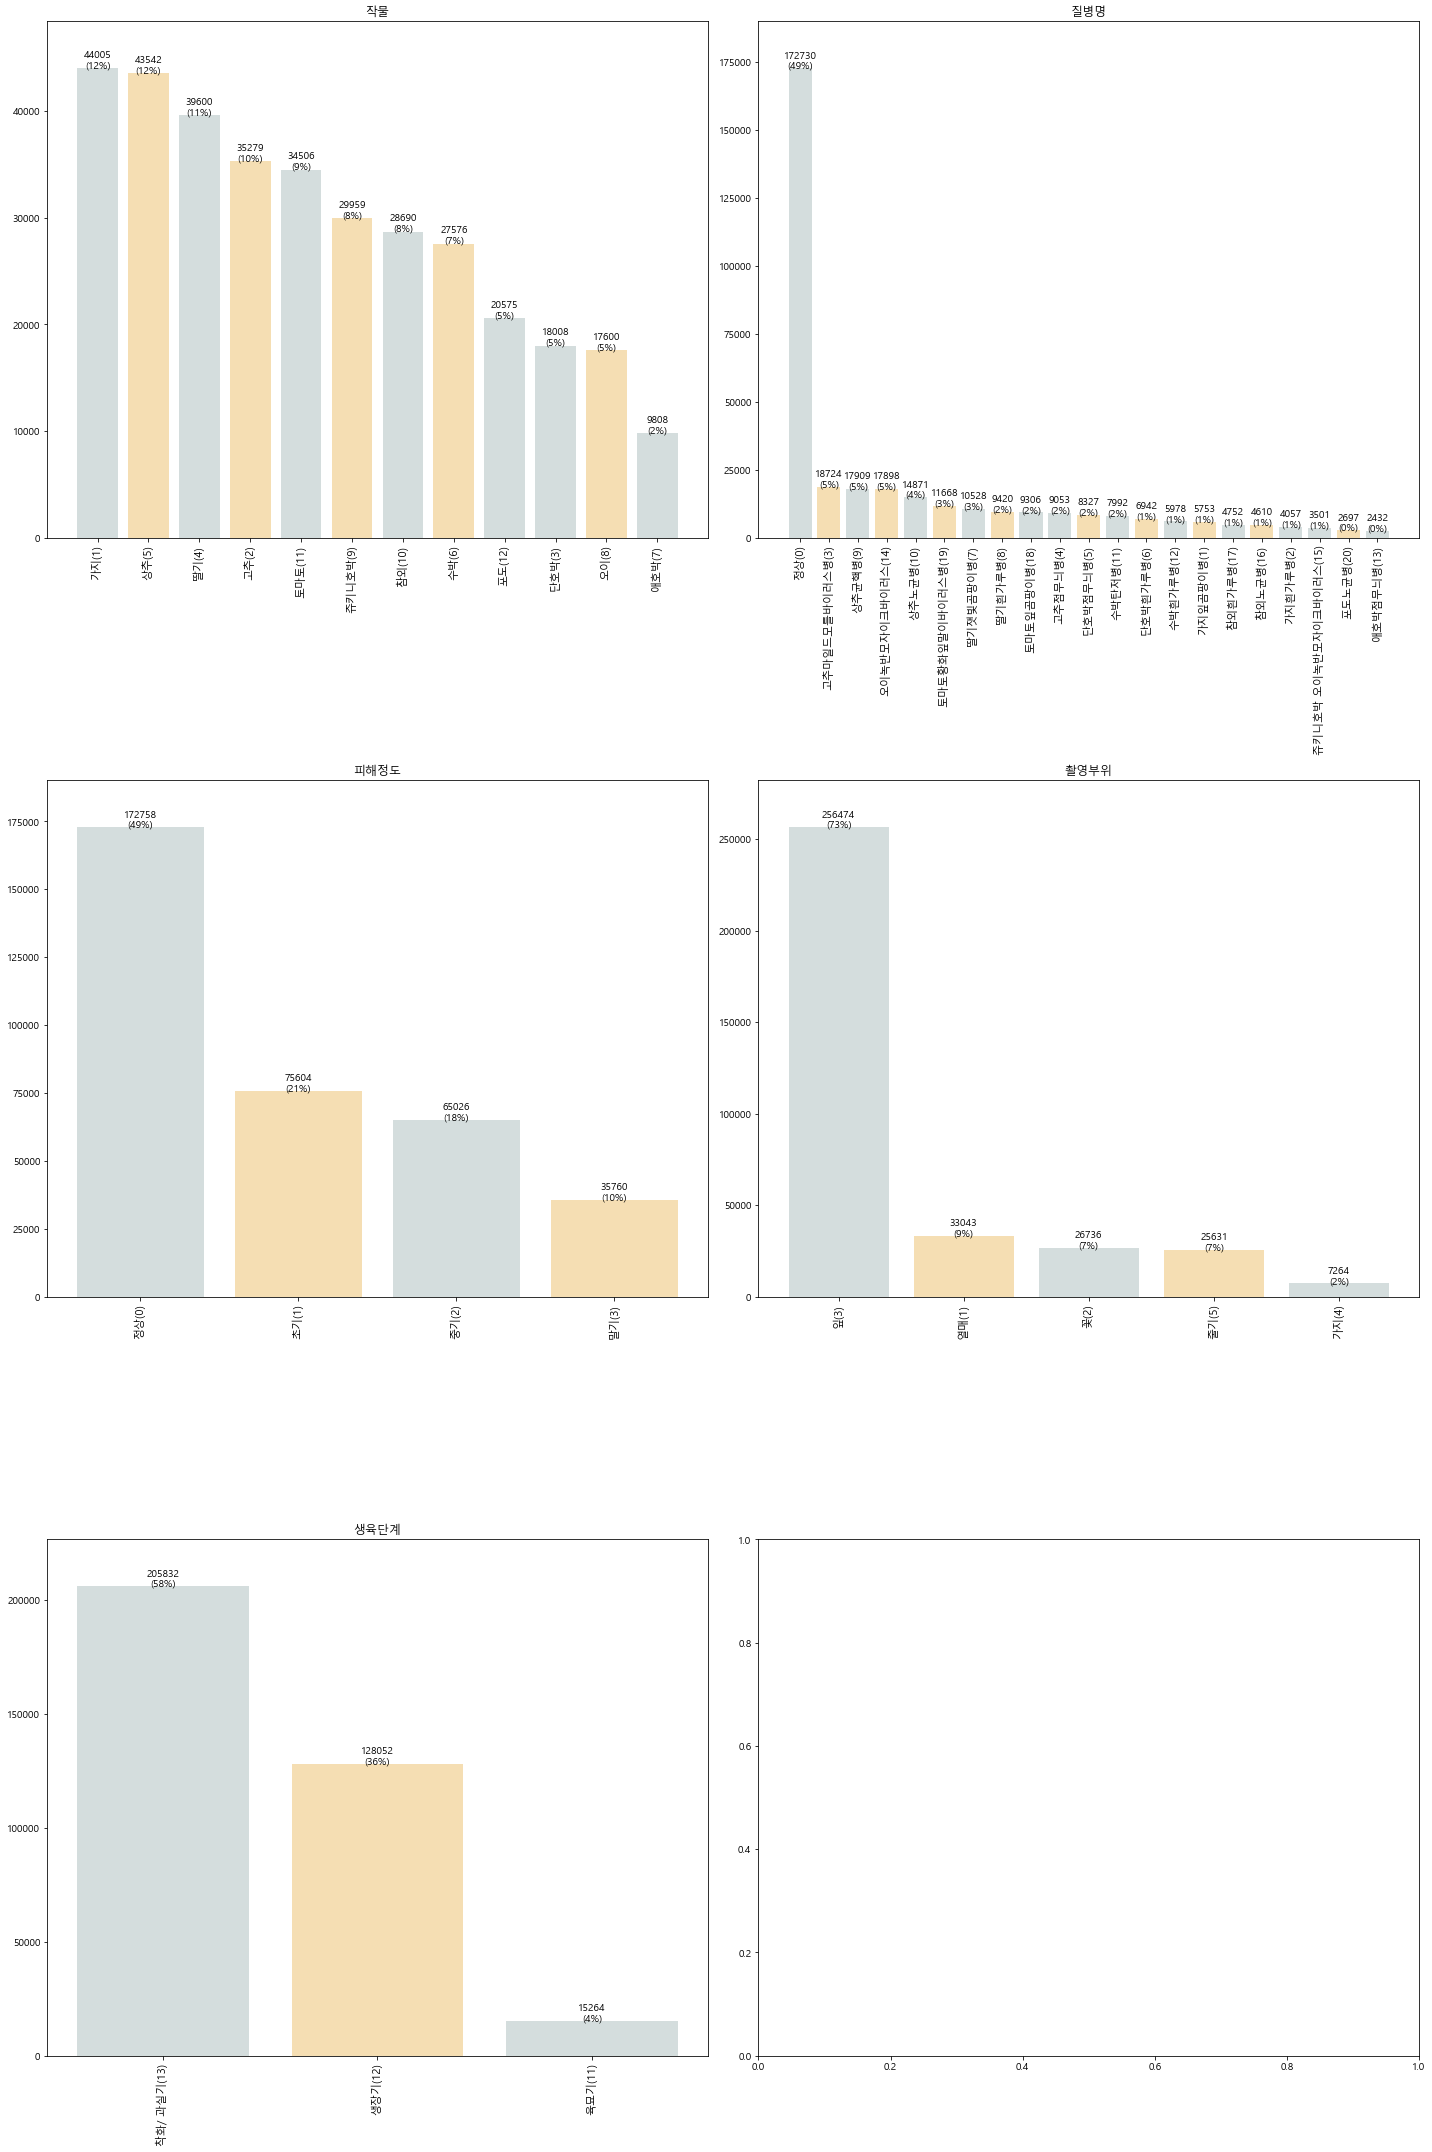

In [23]:
### Train data
f, axs = plt.subplots(3,2,figsize=(20,30))
axs = axs.flatten()

for i, col in enumerate(['작물', '질병명', '피해정도', '촬영부위', '생육단계']):
    object_cnt = tr_json_df[col].value_counts().sort_values(ascending=False)
    axs[i].bar(object_cnt.index, object_cnt.values, color=['#d4dddd' if i%2==0 else '#F5DEB3' for i in range(9)])

    for x,y,z in zip(object_cnt.index, object_cnt.values,object_cnt.values/object_cnt.sum()*100):                                       # <--
        axs[i].annotate('%d\n(%d%%)' %(int(y),z), xy=(x,y+70), textcoords='data', ha = 'center') 

    axs[i].axis(ymin=0,ymax=int(max(object_cnt)*1.1))
    axs[i].set_xticklabels(object_cnt.index, rotation = 90, fontsize = 11)
    axs[i].set_title(col) 
    
f.tight_layout()
plt.savefig('./Class분포도_시설작물_train.png')

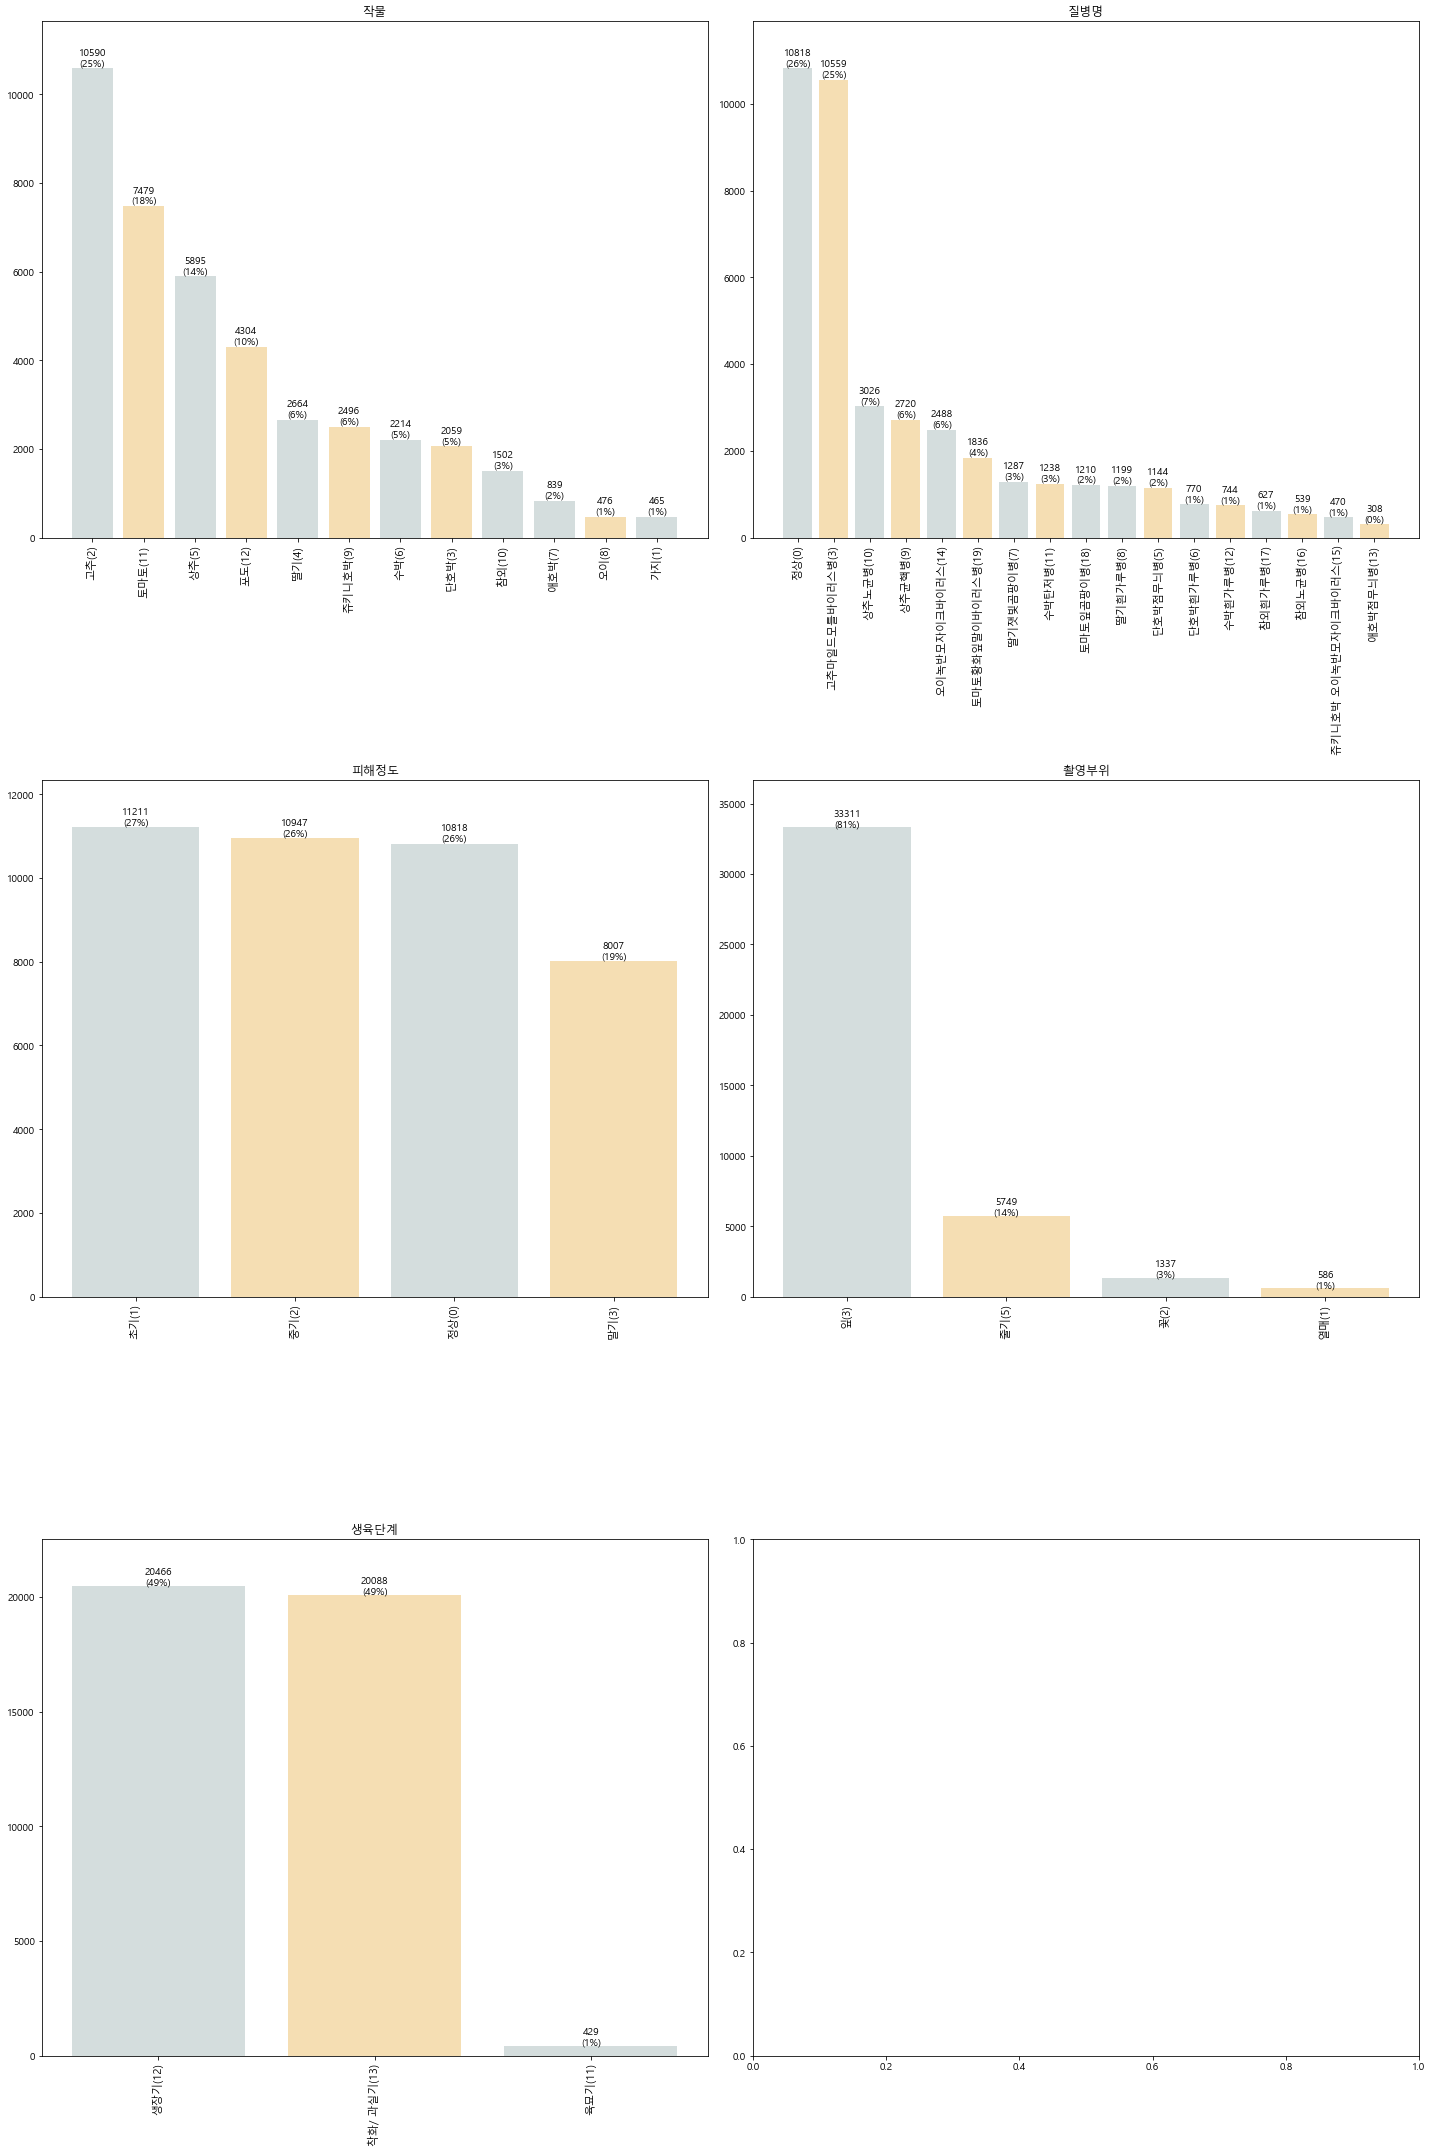

In [24]:
# Valid data
f, axs = plt.subplots(3,2,figsize=(20,30))
axs = axs.flatten()

for i, col in enumerate(['작물', '질병명', '피해정도', '촬영부위', '생육단계']):
    object_cnt = tr_json_df_vd[col].value_counts().sort_values(ascending=False)
    axs[i].bar(object_cnt.index, object_cnt.values, color=['#d4dddd' if i%2==0 else '#F5DEB3' for i in range(9)])

    for x,y,z in zip(object_cnt.index, object_cnt.values,object_cnt.values/object_cnt.sum()*100):                                       # <--
        axs[i].annotate('%d\n(%d%%)' %(int(y),z), xy=(x,y+70), textcoords='data', ha = 'center') 

    axs[i].axis(ymin=0,ymax=int(max(object_cnt)*1.1))
    axs[i].set_xticklabels(object_cnt.index, rotation = 90, fontsize = 11)
    axs[i].set_title(col) 
    
f.tight_layout()
# plt.show()
plt.savefig('./Class분포도_시설작물_valid.png')

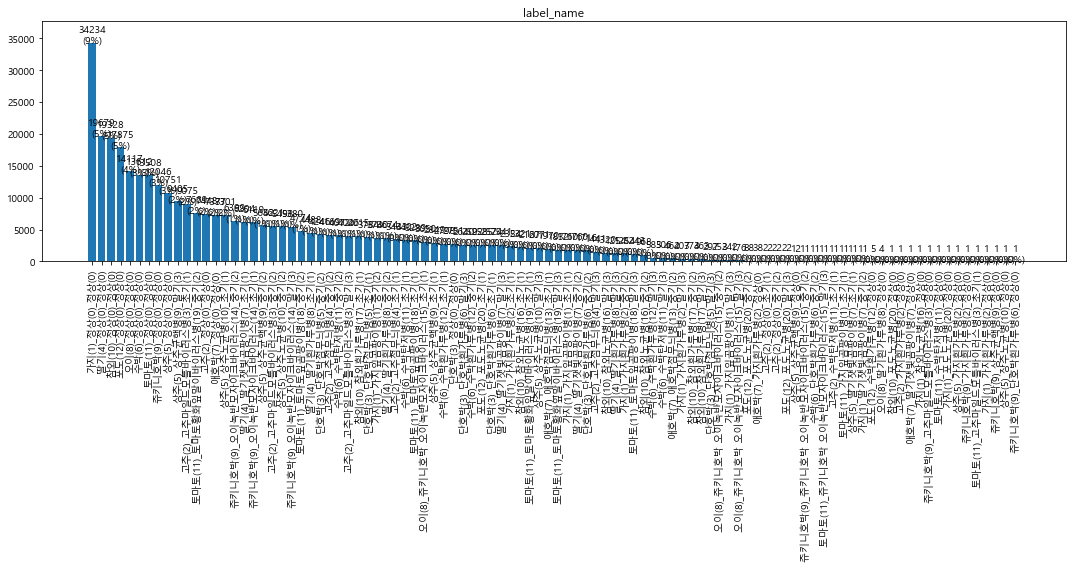

In [25]:
# Train data
f, axs = plt.subplots(1,1,figsize=(15,8))
# axs = axs.flatten()
for i, col in enumerate(['label_name']):
    object_cnt = tr_json_df[col].value_counts().sort_values(ascending=False)
    axs.bar(object_cnt.index, object_cnt.values)
    for x,y,z in zip(object_cnt.index, object_cnt.values,object_cnt.values/object_cnt.sum()*100):                                       # <--
        axs.annotate('%d\n(%d%%)' %(int(y),z), xy=(x,y+30), textcoords='data', ha = 'center') 
    axs.axis(ymin=0,ymax=int(max(object_cnt)*1.1))
    axs.set_xticklabels(object_cnt.index, rotation = 90)
    axs.set_title(col)
f.tight_layout()
# plt.show()
plt.savefig('./label_name분포도_시설작물_train')

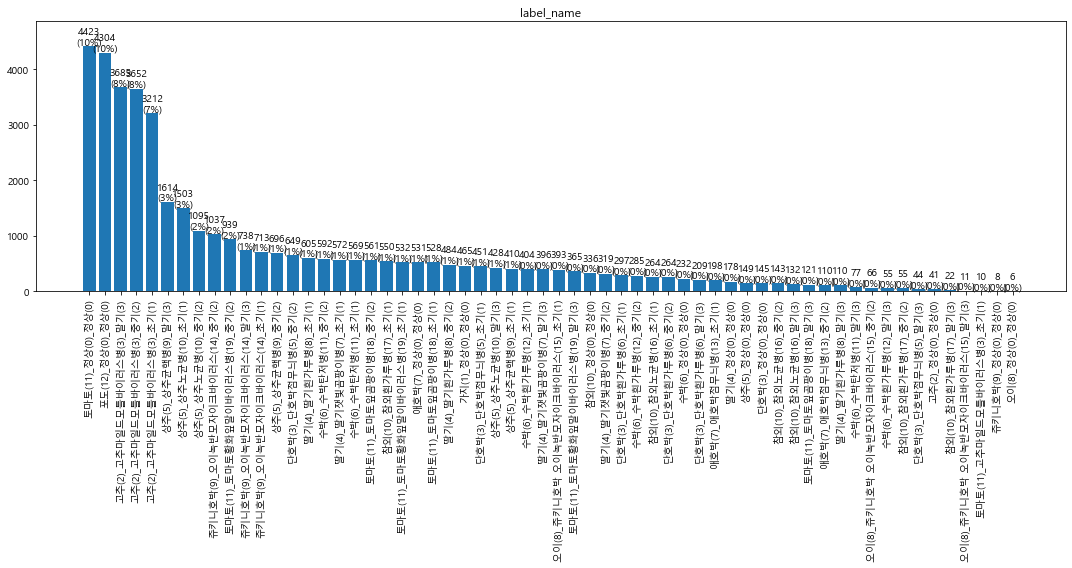

In [26]:
# Valid
f, axs = plt.subplots(1,1,figsize=(15,8))
# axs = axs.flatten()
for i, col in enumerate(['label_name']):
    object_cnt = tr_json_df_vd[col].value_counts().sort_values(ascending=False)
    axs.bar(object_cnt.index, object_cnt.values)
    for x,y,z in zip(object_cnt.index, object_cnt.values,object_cnt.values/object_cnt.sum()*100):                                       # <--
        axs.annotate('%d\n(%d%%)' %(int(y),z), xy=(x,y+30), textcoords='data', ha = 'center') 
    axs.axis(ymin=0,ymax=int(max(object_cnt)*1.1))
    axs.set_xticklabels(object_cnt.index, rotation = 90)
    axs.set_title(col)
f.tight_layout()
# plt.show()
plt.savefig('./label_name분포도_시설작물_valid')

# 각 Class 별 관계도

In [28]:
import plotly.io as pio
pio.renderers.default = "notebook_connected" 

In [29]:
# Train
tmp = tr_json_df.groupby('작물')['질병명'].value_counts().rename('cnt').reset_index()
tmp2 = tr_json_df.groupby(['질병명'])['피해정도'].value_counts().rename('cnt').reset_index()

i = 0
tmp_dict = {}

for c_list in [tmp['작물'].unique(), tmp['질병명'].unique(), tmp2['피해정도'].unique()]:
    for x in c_list:
        tmp_dict[x] = i
        i+=1 

NODES = dict(label = list(tmp_dict.keys()),)

LINKS = dict(source = list(tmp['작물'].map(tmp_dict).values) + list(tmp2['질병명'].map(tmp_dict).values), 
        target = list(tmp['질병명'].map(tmp_dict).values) + list(tmp2['피해정도'].map(tmp_dict).values),
        value =  list(tmp['cnt'].values) + list(tmp2['cnt'].values),)

data = go.Sankey(node = NODES, link = LINKS)
fig = go.Figure(data)
fig.show()
fig.write_html('작물_질병_피해정도관계_시설작물_train.html')

In [30]:
# Valid
tmp_vd = tr_json_df_vd.groupby('작물')['질병명'].value_counts().rename('cnt').reset_index()
tmp2_vd = tr_json_df_vd.groupby(['질병명'])['피해정도'].value_counts().rename('cnt').reset_index()

i = 0
tmp_dict_vd = {}

for c_list in [tmp_vd['작물'].unique(), tmp_vd['질병명'].unique(), tmp2_vd['피해정도'].unique()]:
    for x in c_list:
        tmp_dict_vd[x] = i
        i+=1 

NODES = dict(label = list(tmp_dict_vd.keys()),)
LINKS = dict(source = list(tmp_vd['작물'].map(tmp_dict_vd).values) + list(tmp2_vd['질병명'].map(tmp_dict_vd).values), 
        target = list(tmp_vd['질병명'].map(tmp_dict_vd).values) + list(tmp2_vd['피해정도'].map(tmp_dict_vd).values),
        value =  list(tmp_vd['cnt'].values) + list(tmp2_vd['cnt'].values),)

data = go.Sankey(node = NODES, link = LINKS)
fig = go.Figure(data)
fig.show()
fig.write_html('작물_질병_피해정도관계_시설작물_valid.html')

## 작물 / 촬영부위 / 질병명 관계 비교

In [31]:
# Train
tmp = tr_json_df.groupby('작물')['촬영부위'].value_counts().rename('cnt').reset_index()
tmp2 = tr_json_df.groupby(['촬영부위'])['질병명'].value_counts().rename('cnt').reset_index()

i = 0
tmp_dict = {}

for c_list in [tmp['작물'].unique(), tmp['촬영부위'].unique(), tmp2['질병명'].unique()]:
    for x in c_list:
        tmp_dict[x] = i
        i+=1 
        
NODES = dict(label = list(tmp_dict.keys()),)
LINKS = dict(source = list(tmp['작물'].map(tmp_dict).values) + list(tmp2['촬영부위'].map(tmp_dict).values), 
        target = list(tmp['촬영부위'].map(tmp_dict).values) + list(tmp2['질병명'].map(tmp_dict).values), 
        value =  list(tmp['cnt'].values) + list(tmp2['cnt'].values),)

data = go.Sankey(node = NODES, link = LINKS)
fig = go.Figure(data)
fig.show()
fig.write_html('작물_촬영부위_질병관계_시설작물_train.html')

In [32]:
# Valid
tmp_vd = tr_json_df_vd.groupby('작물')['촬영부위'].value_counts().rename('cnt').reset_index()
tmp2_vd = tr_json_df_vd.groupby(['촬영부위'])['질병명'].value_counts().rename('cnt').reset_index()

i = 0
tmp_dict_vd = {}

for c_list in [tmp_vd['작물'].unique(), tmp_vd['촬영부위'].unique(), tmp2_vd['질병명'].unique()]:
    for x in c_list:
        tmp_dict_vd[x] = i
        i+=1 
        
NODES = dict(label = list(tmp_dict_vd.keys()),)
LINKS = dict(source = list(tmp_vd['작물'].map(tmp_dict_vd).values) + list(tmp2_vd['촬영부위'].map(tmp_dict_vd).values), 
        target = list(tmp_vd['촬영부위'].map(tmp_dict_vd).values) + list(tmp2_vd['질병명'].map(tmp_dict_vd).values), 
        value =  list(tmp_vd['cnt'].values) + list(tmp2_vd['cnt'].values),)

data = go.Sankey(node = NODES, link = LINKS)
fig = go.Figure(data)
fig.show()
fig.write_html('작물_촬영부위_질병관계_시설작물_valid.html')